### Começamos importando as bibliotecas

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
import pandas as pd
from geopy.geocoders import Nominatim
from time import sleep

### Pegamos os dados

In [241]:
dados = pd.read_csv('/content/house_prices.csv', sep=',')
print(dados.head())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

### Analisando os dados

In [242]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [243]:
dados.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [244]:
dados.shape

(21613, 21)

In [245]:
dados

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Identificamos que há valores inseridos duas vezes.

In [246]:
# Verificar duplicatas com base nas colunas 'id' e 'price'
duplicatas = dados[dados.duplicated(subset=['id', 'price'], keep=False)]

if not duplicatas.empty:
    print("Há valores duplicados nas colunas 'id' e 'price':")
    print(duplicatas)
else:
    print("Não há valores duplicados nas colunas 'id' e 'price'.")

Há valores duplicados nas colunas 'id' e 'price':
               id             date     price  bedrooms  bathrooms  \
3950   1825069031  20140814T000000  550000.0         4       1.75   
3951   1825069031  20141016T000000  550000.0         4       1.75   
14982  6308000010  20141208T000000  585000.0         3       2.50   
14983  6308000010  20150423T000000  585000.0         3       2.50   
20053  8648900110  20140505T000000  555000.0         3       2.50   
20054  8648900110  20140826T000000  555000.0         3       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
3950          2410      8447     2.0           0     3  ...      8   
3951          2410      8447     2.0           0     3  ...      8   
14982         2290      5089     2.0           0     0  ...      9   
14983         2290      5089     2.0           0     0  ...      9   
20053         1940      3211     2.0           0     0  ...      8   
20054         1940      3211     2.0          

Vamos remove-los

In [247]:
## removendo  dados duplicados

dados_sem_duplicatas = dados.drop_duplicates(subset=['id', 'price'])
dados =  dados_sem_duplicatas

In [248]:
## verificando novamente, para confirmar que foram removidos

duplicatas = dados[dados.duplicated(subset=['id', 'price'], keep=False)]

if not duplicatas.empty:
    print("Há valores duplicados nas colunas 'id' e 'price':")
    print(duplicatas)
else:
    print("Não há valores duplicados nas colunas 'id' e 'price'.")

Não há valores duplicados nas colunas 'id' e 'price'.


### Retirando a coluna ID e Date

As colunas não representam informações significantes.
Date é referência ao dia de captura da informação.

In [249]:
## Retirando a coluna 'id'

dados.drop(columns='id', inplace=True)
dados.drop(columns='date', inplace=True)

## Formatando a coluna

<ipython-input-249-fe81c6dd31d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.drop(columns='id', inplace=True)
<ipython-input-249-fe81c6dd31d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.drop(columns='date', inplace=True)


In [250]:
dados.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [251]:
dados.shape

(21610, 19)

### Formatando a coluna price

Vamos formatar a coluna price para float

In [252]:
## criando função para converter

def formatar_preco(preco):
    if isinstance(preco, str):  # verifica se é uma string
        return preco.replace(',', '.')
    else:
        return preco  # se já for float, apenas retorna o valor

dados['price'] = dados['price'].apply(formatar_preco)
dados['price'] = dados['price'].astype(float)  # convertendo

<ipython-input-252-f16db36bb3d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['price'] = dados['price'].apply(formatar_preco)
<ipython-input-252-f16db36bb3d9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['price'] = dados['price'].astype(float)  # convertendo


In [253]:
dados.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [254]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21610 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21610 non-null  float64
 1   bedrooms       21610 non-null  int64  
 2   bathrooms      21610 non-null  float64
 3   sqft_living    21610 non-null  int64  
 4   sqft_lot       21610 non-null  int64  
 5   floors         21610 non-null  float64
 6   waterfront     21610 non-null  int64  
 7   view           21610 non-null  int64  
 8   condition      21610 non-null  int64  
 9   grade          21610 non-null  int64  
 10  sqft_above     21610 non-null  int64  
 11  sqft_basement  21610 non-null  int64  
 12  yr_built       21610 non-null  int64  
 13  yr_renovated   21610 non-null  int64  
 14  zipcode        21610 non-null  int64  
 15  lat            21610 non-null  float64
 16  long           21610 non-null  float64
 17  sqft_living15  21610 non-null  int64  
 18  sqft_lot15 

## Convertendo as variáveis que estão em pés quadrados para metros quadrados

In [255]:
## Criando a função para transformar as variáveis em metros

def sqft_to_sqm(sqft):
    return sqft * 0.092903

# Aplicando a função ao dataframe
dados['sqft_living'] = dados['sqft_living'].apply(sqft_to_sqm)
dados['sqft_lot'] = dados['sqft_lot'].apply(sqft_to_sqm)
dados['sqft_above'] = dados['sqft_above'].apply(sqft_to_sqm)
dados['sqft_basement'] = dados['sqft_basement'].apply(sqft_to_sqm)
dados['sqft_living15'] = dados['sqft_living15'].apply(sqft_to_sqm)
dados['sqft_lot15'] = dados['sqft_lot15'].apply(sqft_to_sqm)

<ipython-input-255-c7e631106abf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['sqft_living'] = dados['sqft_living'].apply(sqft_to_sqm)
<ipython-input-255-c7e631106abf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['sqft_lot'] = dados['sqft_lot'].apply(sqft_to_sqm)
<ipython-input-255-c7e631106abf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [256]:
dados.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,3,7,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950
1,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,3,7,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017
2,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,3,6,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986
3,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,5,7,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000
4,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,3,8,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209


Verificamos que existem variáveis similares.
Tomamos como hipotése as seguintes diferenças:

sqft_living15: Refere-se à média da área útil ou habitável das 15 casas mais próximas em pés quadrados. Esse valor é usado para dar uma ideia do tamanho médio das casas na vizinhança.

sqft_lot15: Refere-se à média do tamanho do lote das 15 casas mais próximas em pés quadrados. Assim como o sqft_living15, esse valor fornece uma média do tamanho dos lotes nas proximidades.

# Tratando dados nulos e vázios

In [257]:
# Verificar valores nulos
nulos = dados.isnull()

# Verificar strings vazias
strings_vazias = dados.applymap(lambda x: isinstance(x, str) and x == '')

# Verificar valores em branco (espaços)
valores_brancos = dados.applymap(lambda x: isinstance(x, str) and x.isspace())

# Combinar todas as verificações
valores_problematicos = nulos | strings_vazias | valores_brancos

# Exibir os valores problematicos
if valores_problematicos.any().any():  # Checando se qualquer valor é True
    print("Existem valores problematicos")
else:
    print("Não existem valores problematicos")

Não existem valores problematicos


In [258]:
dados

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,3,7,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950
1,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,3,7,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017
2,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,3,6,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986
3,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,5,7,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000
4,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,3,8,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,142.14159,105.073293,3.0,0,0,3,8,142.14159,0.00000,2009,0,98103,47.6993,-122.346,142.14159,140.190627
21609,400000.0,4,2.50,214.60593,540.045139,2.0,0,0,3,8,214.60593,0.00000,2014,0,98146,47.5107,-122.362,170.01249,668.901600
21610,402101.0,2,0.75,94.76106,125.419050,2.0,0,0,3,7,94.76106,0.00000,2009,0,98144,47.5944,-122.299,94.76106,186.456321
21611,400000.0,3,2.50,148.64480,221.852364,2.0,0,0,3,8,148.64480,0.00000,2004,0,98027,47.5345,-122.069,130.99323,119.566161


In [259]:
print(dados.head())

      price  bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  \
0  221900.0         3       1.00    109.62554  524.901950     1.0           0   
1  538000.0         3       2.25    238.76071  672.803526     2.0           0   
2  180000.0         2       1.00     71.53531  929.030000     1.0           0   
3  604000.0         4       3.00    182.08988  464.515000     1.0           0   
4  510000.0         3       2.00    156.07704  750.656240     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7   109.62554        0.00000      1955             0   
1     0          3      7   201.59951       37.16120      1951          1991   
2     0          3      6    71.53531        0.00000      1933             0   
3     0          5      7    97.54815       84.54173      1965             0   
4     0          3      8   156.07704        0.00000      1987             0   

   zipcode      lat     long  sq

# Tratando a variável Grade

Identificamos que a variável representa uma nota de 0 à 13 aos imóveis.

Vamos dar uma olhada:

In [260]:
## identificandos os imóveis com maiores notas.

dados.query('grade == 13')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4411,5570000.0,5,5.75,854.70760,3258.015307,2.0,0,0,3,13,575.99860,278.70900,2001,0,98039,47.6289,-122.233,330.73468,2261.723535
4811,2479000.0,5,3.75,632.66943,696.772500,2.5,0,0,3,13,567.63733,65.03210,1922,0,98102,47.6285,-122.322,247.12198,696.772500
5451,1780000.0,4,3.25,454.29567,1245.086006,2.0,0,0,3,13,454.29567,0.00000,2004,0,98059,47.5303,-122.131,537.90837,1257.813717
6041,2385000.0,4,4.00,588.07599,1235.238288,2.0,0,2,3,13,455.22470,132.85129,2000,0,98033,47.6488,-122.201,204.38660,854.335988
7035,3800000.0,5,5.50,654.96615,3979.964520,1.0,0,2,4,13,401.34096,253.62519,1978,0,98004,47.6229,-122.220,471.01821,1911.014710
7252,7700000.0,6,8.00,1119.48115,2564.122800,2.5,0,3,4,13,796.17871,323.30244,1910,1987,98102,47.6298,-122.323,366.03782,817.546400
7907,3200000.0,6,5.00,659.61130,1690.834600,2.5,0,0,3,13,486.81172,172.79958,1933,2002,98199,47.6427,-122.408,290.78639,601.732731
9254,6885000.0,6,7.75,918.81067,2914.738722,2.0,0,4,3,13,823.12058,95.69009,2001,0,98039,47.6305,-122.240,421.77962,3969.745190
10373,2983000.0,5,5.50,687.48220,1755.680894,2.0,0,3,3,13,584.35987,103.12233,2001,0,98006,47.5431,-122.112,567.63733,2456.541126
13411,2415000.0,5,4.75,732.07564,2252.897750,2.0,0,2,3,13,732.07564,0.00000,1996,0,98177,47.7334,-122.362,254.55422,999.729183


In [261]:
## usando describe para verificar a distribuição das notas

dados['grade'].describe()

count    21610.000000
mean         7.656779
std          1.175500
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

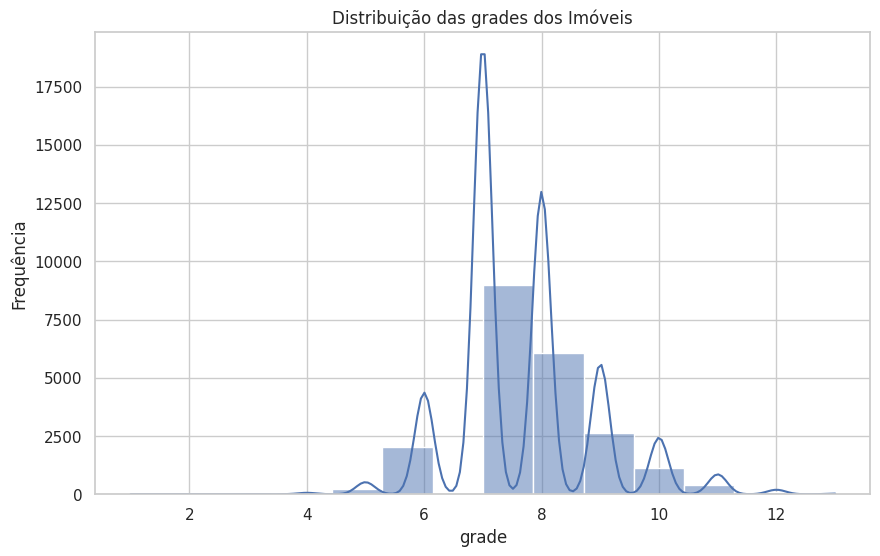

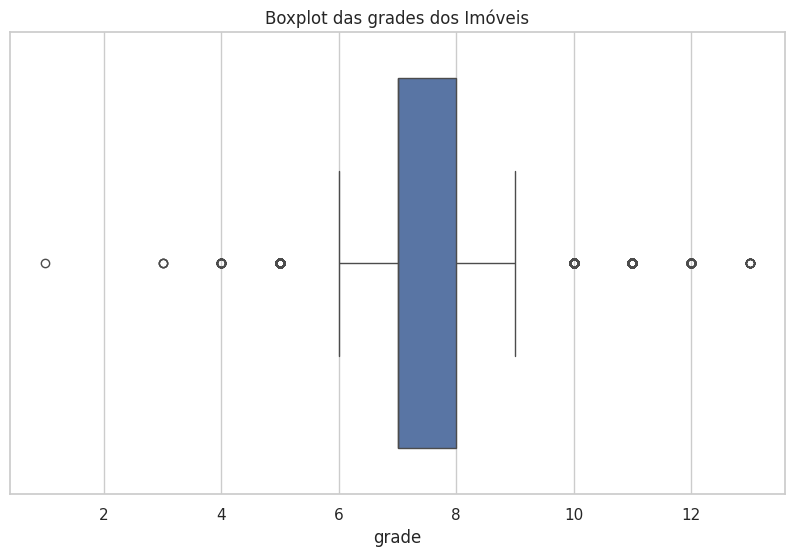

In [262]:
## visualizando graficamente a distribuição de notas.

## histograma
plt.figure(figsize=(10, 6))
sns.histplot(dados['grade'], bins=14, kde=True)
plt.title('Distribuição das grades dos Imóveis')
plt.xlabel('grade')
plt.ylabel('Frequência')
plt.show()

## boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['grade'])
plt.title('Boxplot das grades dos Imóveis')
plt.xlabel('grade')
plt.show()

Para uma melhor interpretação, vamos reduzir a escala paramétrica das notas.

Vamos alterar de 0 à 13, para 0 à 5.

In [263]:
## alterando a escala das notas

dados['nota_reescalada'] = dados['grade'] / 13 * 5

<ipython-input-263-60b16f16fce6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['nota_reescalada'] = dados['grade'] / 13 * 5


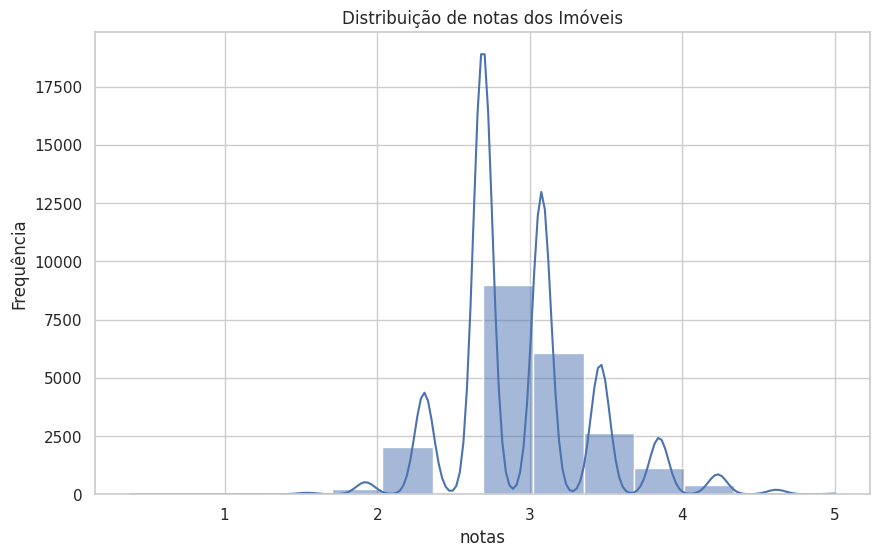

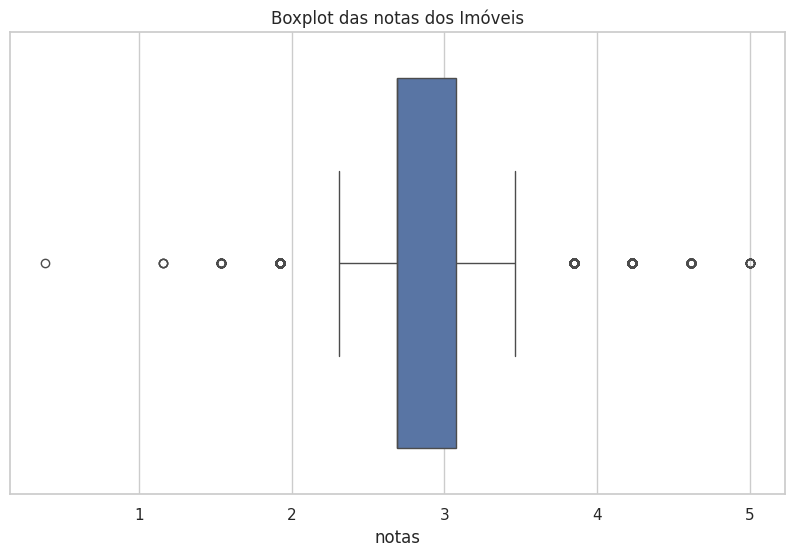

In [264]:
## visualizando graficamente a distribuição de notas reescakadas

plt.figure(figsize=(10, 6))
sns.histplot(dados['nota_reescalada'], bins=14, kde=True)
plt.title('Distribuição de notas dos Imóveis')
plt.xlabel('notas')
plt.ylabel('Frequência')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['nota_reescalada'])
plt.title('Boxplot das notas dos Imóveis')
plt.xlabel('notas')
plt.show()

Alterando a escala das notas, **não mudamos suas características, apenas ajustamos para uma escala menor e mais fácil de visualizar e analisar.**

In [265]:
## Apagando a antiga coluna de grade

dados.drop(columns='grade', inplace=True)

<ipython-input-265-2429feca606d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.drop(columns='grade', inplace=True)


# Tratando Outliers

Vamos verificar os Outliers de Preço

In [266]:
# Calcular Q1 (25º percentil) e Q3 (75º percentil) de price

Q1 = dados['price'].quantile(0.25)
Q3 = dados['price'].quantile(0.75)
IQR = Q3 - Q1

In [267]:
# Definir limites para identificar outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [268]:
# Identificar outliers
outliers = dados[(dados['price'] < lower_bound) | (dados['price'] > upper_bound)]

In [269]:
# Remover outliers do DataFrame
df_cleaned = dados[(dados['price'] >= lower_bound) & (dados['price'] <= upper_bound)]

print(f'Número de outliers identificados: {len(outliers)}')
print(f'Número de entradas após remoção de outliers: {len(df_cleaned)}')

Número de outliers identificados: 1140
Número de entradas após remoção de outliers: 20470


In [270]:
## aplicando os valores sem outliers em nossos dados

dados = df_cleaned

Vamos também tratar os outliers de área habitavel, área lote e banheiro

In [271]:
## tirando outliers de área habitável

Q1 = dados['sqft_living'].quantile(0.25)
Q3 = dados['sqft_living'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identificar outliers
outliers = dados[(dados['sqft_living'] < lower_bound) | (dados['sqft_living'] > upper_bound)]

# Remover outliers do DataFrame
df_cleaned = dados[(dados['sqft_living'] >= lower_bound) & (dados['sqft_living'] <= upper_bound)]

print(f'Número de outliers identificados: {len(outliers)}')
print(f'Número de entradas após remoção de outliers: {len(df_cleaned)}')

## aplicando os valores sem outliers em nossos dados

dados = df_cleaned

Número de outliers identificados: 298
Número de entradas após remoção de outliers: 20172


In [272]:
## tirando outliers de área lote

Q1 = dados['sqft_lot'].quantile(0.25)
Q3 = dados['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identificar outliers
outliers = dados[(dados['sqft_lot'] < lower_bound) | (dados['sqft_lot'] > upper_bound)]

# Remover outliers do DataFrame
df_cleaned = dados[(dados['sqft_lot'] >= lower_bound) & (dados['sqft_lot'] <= upper_bound)]

print(f'Número de outliers identificados: {len(outliers)}')
print(f'Número de entradas após remoção de outliers: {len(df_cleaned)}')

## aplicando os valores sem outliers em nossos dados

dados = df_cleaned

Número de outliers identificados: 2120
Número de entradas após remoção de outliers: 18052


In [273]:
## tirando outliers de banheiro

Q1 = dados['bathrooms'].quantile(0.25)
Q3 = dados['bathrooms'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identificar outliers
outliers = dados[(dados['bathrooms'] < lower_bound) | (dados['bathrooms'] > upper_bound)]

# Remover outliers do DataFrame
df_cleaned = dados[(dados['bathrooms'] >= lower_bound) & (dados['bathrooms'] <= upper_bound)]

print(f'Número de outliers identificados: {len(outliers)}')
print(f'Número de entradas após remoção de outliers: {len(df_cleaned)}')

## aplicando os valores sem outliers em nossos dados

dados = df_cleaned

Número de outliers identificados: 49
Número de entradas após remoção de outliers: 18003


In [274]:
## tirando outliers de quartos

Q1 = dados['bedrooms'].quantile(0.25)
Q3 = dados['bedrooms'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identificar outliers
outliers = dados[(dados['bedrooms'] < lower_bound) | (dados['bedrooms'] > upper_bound)]

# Remover outliers do DataFrame
df_cleaned = dados[(dados['bedrooms'] >= lower_bound) & (dados['bedrooms'] <= upper_bound)]

print(f'Número de outliers identificados: {len(outliers)}')
print(f'Número de entradas após remoção de outliers: {len(df_cleaned)}')

## aplicando os valores sem outliers em nossos dados

dados = df_cleaned

Número de outliers identificados: 382
Número de entradas após remoção de outliers: 17621


In [275]:
## tirando outliers de área lote médio na região

Q1 = dados['sqft_lot15'].quantile(0.25)
Q3 = dados['sqft_lot15'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identificar outliers
outliers = dados[(dados['sqft_lot15'] < lower_bound) | (dados['sqft_lot15'] > upper_bound)]

# Remover outliers do DataFrame
df_cleaned = dados[(dados['sqft_lot15'] >= lower_bound) & (dados['sqft_lot15'] <= upper_bound)]

print(f'Número de outliers identificados: {len(outliers)}')
print(f'Número de entradas após remoção de outliers: {len(df_cleaned)}')

## aplicando os valores sem outliers em nossos dados

dados = df_cleaned

Número de outliers identificados: 439
Número de entradas após remoção de outliers: 17182


In [276]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17182 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            17182 non-null  float64
 1   bedrooms         17182 non-null  int64  
 2   bathrooms        17182 non-null  float64
 3   sqft_living      17182 non-null  float64
 4   sqft_lot         17182 non-null  float64
 5   floors           17182 non-null  float64
 6   waterfront       17182 non-null  int64  
 7   view             17182 non-null  int64  
 8   condition        17182 non-null  int64  
 9   sqft_above       17182 non-null  float64
 10  sqft_basement    17182 non-null  float64
 11  yr_built         17182 non-null  int64  
 12  yr_renovated     17182 non-null  int64  
 13  zipcode          17182 non-null  int64  
 14  lat              17182 non-null  float64
 15  long             17182 non-null  float64
 16  sqft_living15    17182 non-null  float64
 17  sqft_lot15       

# Ajustes finais das variáveis

Para uma melhor análise dos dados vamos:

1. Alterar o nome das colunas.

2. Separar as variáveis númericas das variáveis categóricas.

In [277]:
dados.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'nota_reescalada'],
      dtype='object')

In [278]:
## mudandos os nomes para português

novo_nomes = {'price': 'preco',
              'bedrooms': 'quartos',
              'bathrooms': 'banheiros',
              'sqft_living': 'area_habitavel',
              'sqft_lot': 'area_lote',
              'floors': 'andares',
              'sqft_above': 'area_acima',
              'sqft_basement': 'area_subsolo',
              'yr_built': 'ano_construcao',
              'yr_renovated': 'ano_renovacao',
              'zipcode': 'cep',
              'lat': 'latitude',
              'long': 'longitude',
              'sqft_living15': 'area_habitavel_medio_na_regiao',
              'sqft_lot15': 'area_lote_medio_na_regiao',
              'waterfront': 'vista_mar',
              'view': 'vista',
              'condition': 'condicao',
              'grade': 'nota',
              'interleaved_location': 'localizacao_intercalada'
              }


# Renomeando as colunas
dados = dados.rename(columns=novo_nomes)

In [279]:
dados.columns

Index(['preco', 'quartos', 'banheiros', 'area_habitavel', 'area_lote',
       'andares', 'vista_mar', 'vista', 'condicao', 'area_acima',
       'area_subsolo', 'ano_construcao', 'ano_renovacao', 'cep', 'latitude',
       'longitude', 'area_habitavel_medio_na_regiao',
       'area_lote_medio_na_regiao', 'nota_reescalada'],
      dtype='object')

In [280]:
## separando as colunas em númericas e categóricas

dados_numericos = dados[['preco', 'quartos', 'area_habitavel', 'area_lote', 'andares', 'area_acima', 'area_subsolo', 'ano_construcao',
       'ano_renovacao', 'cep', 'latitude', 'longitude', 'area_habitavel_medio_na_regiao', 'area_lote_medio_na_regiao',
       'banheiros',  'nota_reescalada',]]

dados_categoricos = dados[['vista','condicao']]

In [281]:
dados_numericos.head()

,preco,quartos,area_habitavel,area_lote,andares,area_acima,area_subsolo,ano_construcao,ano_renovacao,cep,latitude,longitude,area_habitavel_medio_na_regiao,area_lote_medio_na_regiao,banheiros,nota_reescalada
0,221900.0,3,109.62554,524.901950,1.0,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,1.00,2.692308
1,538000.0,3,238.76071,672.803526,2.0,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,2.25,2.692308
2,180000.0,2,71.53531,929.030000,1.0,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,1.00,2.307692
3,604000.0,4,182.08988,464.515000,1.0,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,3.00,2.692308
4,510000.0,3,156.07704,750.656240,1.0,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,2.00,3.076923


In [282]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17182 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   preco                           17182 non-null  float64
 1   quartos                         17182 non-null  int64  
 2   banheiros                       17182 non-null  float64
 3   area_habitavel                  17182 non-null  float64
 4   area_lote                       17182 non-null  float64
 5   andares                         17182 non-null  float64
 6   vista_mar                       17182 non-null  int64  
 7   vista                           17182 non-null  int64  
 8   condicao                        17182 non-null  int64  
 9   area_acima                      17182 non-null  float64
 10  area_subsolo                    17182 non-null  float64
 11  ano_construcao                  17182 non-null  int64  
 12  ano_renovacao                   17182

Verificamos que as variáveis categóricas se tornaram booleanas, vamos converte-las em int

# Análises dos dados

Vamos começar analisando estatísticamente e visualmente as variáveis numéricas.

In [283]:
dados_numericos.describe()

,preco,quartos,area_habitavel,area_lote,andares,area_acima,area_subsolo,ano_construcao,ano_renovacao,cep,latitude,longitude,area_habitavel_medio_na_regiao,area_lote_medio_na_regiao,banheiros,nota_reescalada
count,1.718200e+04,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000
mean,4.628357e+05,3.284658,174.609496,649.306756,1.477069,151.040261,23.569235,1970.320626,68.079153,98081.719998,47.560488,-122.228883,171.604666,637.807428,2.010127,2.867088
std,2.002058e+05,0.786902,62.784475,300.136062,0.545068,60.169732,35.544605,29.968950,362.322169,53.851624,0.138245,0.132068,52.061365,264.772860,0.672063,0.362213
min,7.800000e+04,2.000000,48.309560,48.309560,1.000000,44.593440,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.475000,57.599860,60.479853,0.500000,1.538462
25%,3.085688e+05,3.000000,127.277110,443.542148,1.000000,106.838450,0.000000,1950.000000,0.000000,98033.000000,47.474125,-122.337000,133.780320,450.858259,1.500000,2.692308
50%,4.250000e+05,3.000000,166.296370,652.875833,1.000000,135.638380,0.000000,1972.000000,0.000000,98074.000000,47.570100,-122.267000,161.651220,664.256450,2.000000,2.692308
75%,5.800000e+05,4.000000,214.605930,836.127000,2.000000,183.018910,46.451500,1998.000000,0.000000,98119.000000,47.680300,-122.152000,201.599510,808.720615,2.500000,3.076923
max,1.130000e+06,5.000000,371.612000,1672.254000,3.500000,371.612000,185.806000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,459.869850,1375.893430,4.000000,4.230769


Análise de nossa variável target preço.

In [284]:
print('Preço mínimo: ',dados_numericos['preco'].min())
print('Preço máximo: ',dados_numericos['preco'].max())
print('Preço médio: ',dados_numericos['preco'].mean())

Preço mínimo:  78000.0
Preço máximo:  1130000.0
Preço médio:  462835.66616226285


## Histograma da distribuição

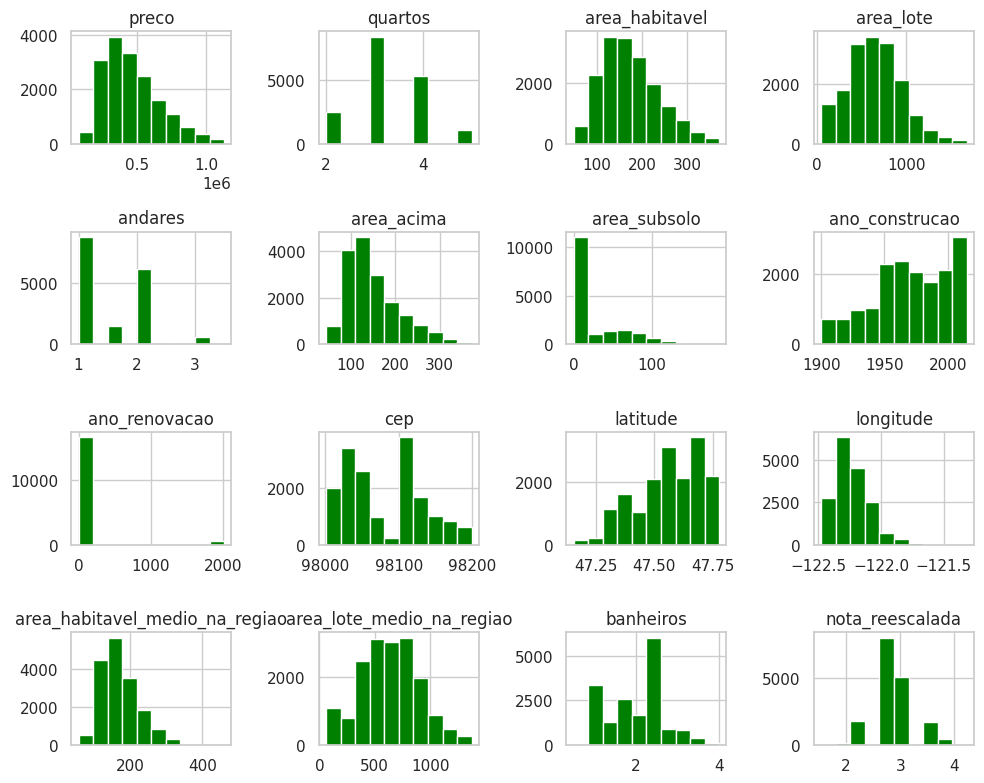

In [285]:
## verificando a distribuição dos dados númericos

dados_numericos.hist(color = 'green', figsize=(10, 8))
plt.tight_layout()
plt.show()

## Boxplots das variáveis númericas

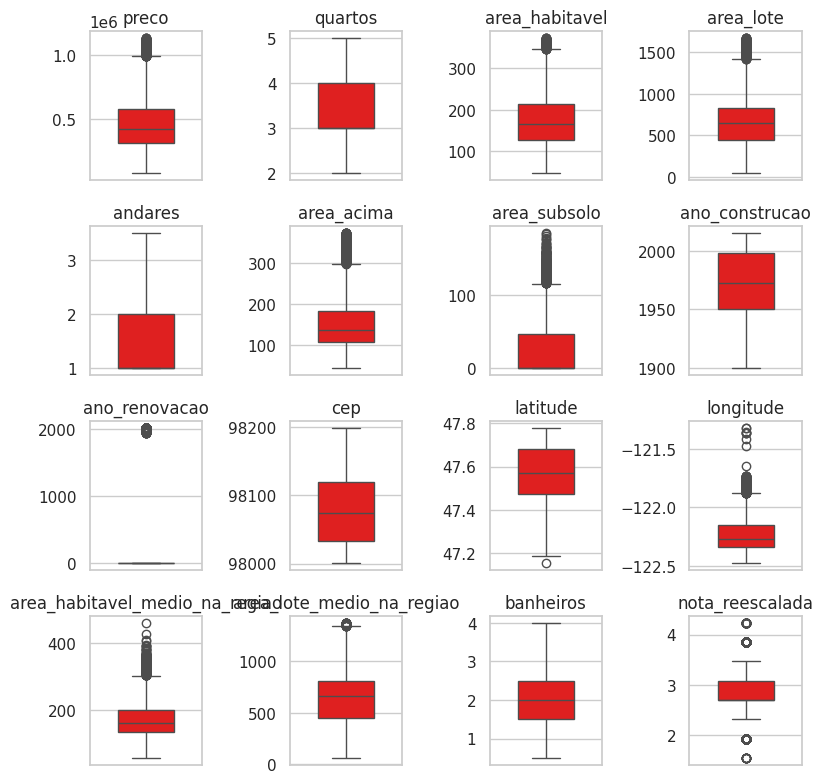

In [286]:
## criando vários boxplots

sns.set(style="whitegrid")

# Calculando o númere de colunas.
num_cols = len(dados_numericos.columns)

# Calculando o número de linhas necessárias para exibir todos os boxplots
num_rows = (num_cols + 3) // 4  # Arredondando para cima

# Configurando os boxplots
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(8, 2 * num_rows))
axes = axes.flatten()

# Iterando e criandos os boxplots
for i, col in enumerate(dados_numericos.columns):
    sns.boxplot(y=dados_numericos[col], ax=axes[i], width=0.5, color='red')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


for i in range(num_cols, len(axes)):
    axes[i].axis('off')

# Ajustando o layout
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Preço')

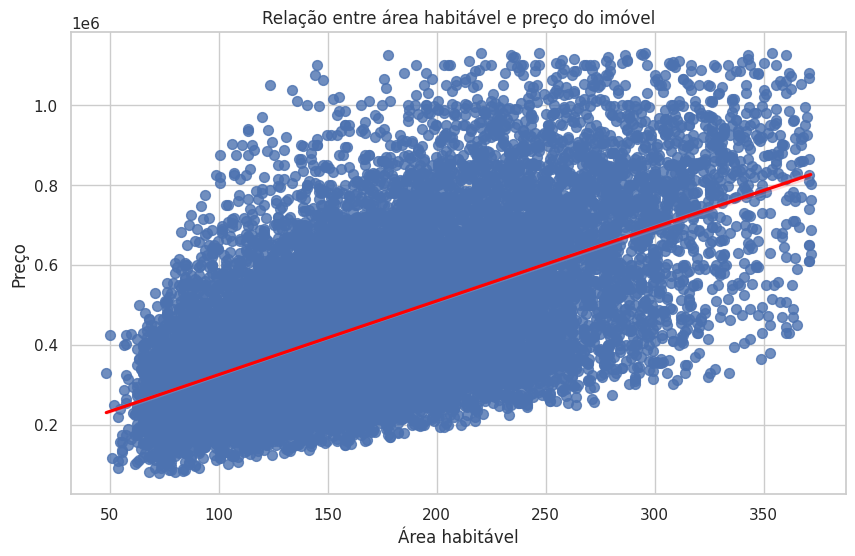

In [287]:
## grafico de linha de área habitável por preço do imovel.

plt.figure(figsize=(10, 6))

# Criar o gráfico de dispersão
sns.regplot(x='area_habitavel', y='preco', data=dados_numericos, scatter_kws={"s": 50}, line_kws={"color": "red"})

# Adicionar título e rótulos aos eixos
plt.title('Relação entre área habitável e preço do imóvel')
plt.xlabel('Área habitável')
plt.ylabel('Preço')

<Axes: xlabel='area_habitavel_medio_na_regiao', ylabel='preco'>

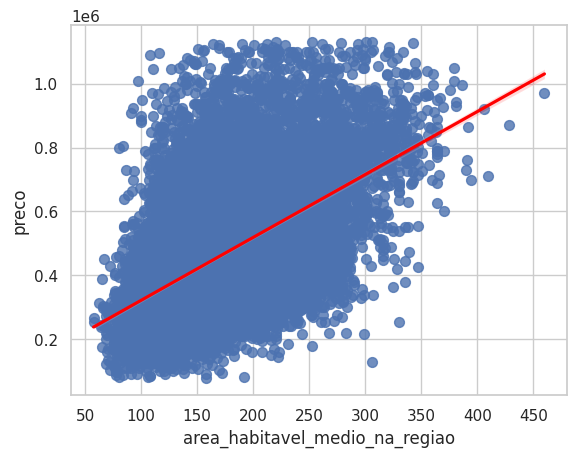

In [288]:
# Outro gráfico de linha comparando o preço com a área habitável media na região

sns.regplot(x=dados_numericos['area_habitavel_medio_na_regiao'], y=dados_numericos['preco'], data = dados_numericos, scatter_kws={"s": 50}, line_kws={"color": "red"})

In [289]:
## ajustando as colunas em númericas e categóricas

dados_numericos = dados[['preco', 'quartos', 'area_habitavel', 'area_lote', 'andares', 'area_acima', 'area_subsolo', 'ano_construcao',
       'ano_renovacao', 'cep', 'latitude', 'longitude', 'area_habitavel_medio_na_regiao', 'area_lote_medio_na_regiao',
       'banheiros',  'nota_reescalada',]]

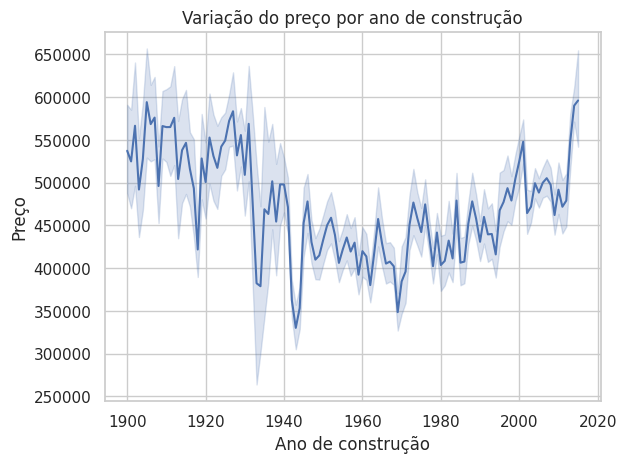

In [290]:
# Criando um gráfico de linha de preço por ano.

## verificando visualmente o preço por cada ano.

sns.lineplot(data=dados_numericos, x='ano_construcao', y='preco', color = 'b')
plt.title('Variação do preço por ano de construção')
plt.xlabel('Ano de construção')
plt.ylabel('Preço')
plt.show()

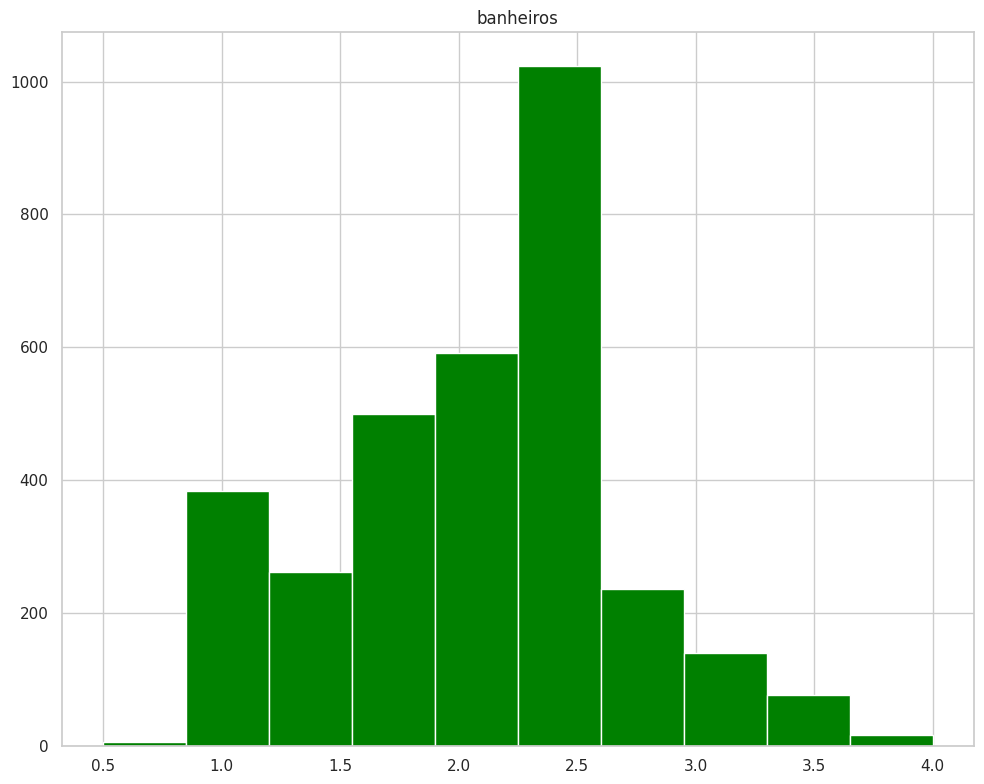

In [291]:
## aqui criamos uma histograma com a média de preços dos banheiros

preco_banheiro = dados.groupby('preco')[['banheiros']].mean()

preco_banheiro.hist(color = 'green', figsize=(10, 8))
plt.tight_layout()
plt.show()

## Análise com as variáveis categóricas

In [292]:
dados_categoricos.columns

Index(['vista', 'condicao'], dtype='object')

Vamos plotar vários boxplots comparando a variável preço com as variáveis categóricas

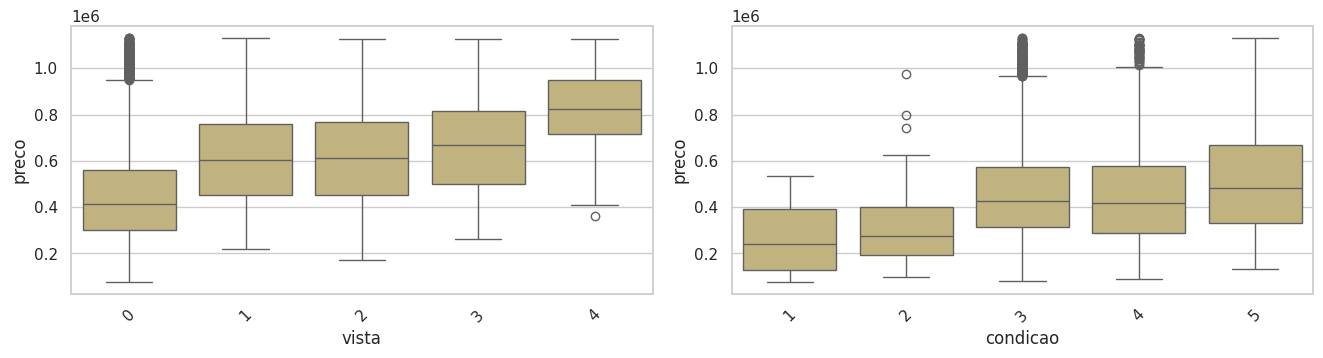

In [293]:

## criando a condição com as colunas que queremos visualizar

conditions = ['vista', 'condicao']

# Configuração da figura
plt.figure(figsize=(20, 10))

# Loop para criar um boxplot para cada condição

for i, condition in enumerate(conditions, 1):
    plt.subplot(3, 3, i)  # Organiza os gráficos em uma grade de 3x3
    sns.boxplot(x=condition, y='preco', data=dados, color = 'y')
    plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para melhor legibilidade

plt.tight_layout()
plt.show()

# Análise de Correlação de Pearson

In [294]:
dados_numericos.count()

preco                             17182
quartos                           17182
area_habitavel                    17182
area_lote                         17182
andares                           17182
area_acima                        17182
area_subsolo                      17182
ano_construcao                    17182
ano_renovacao                     17182
cep                               17182
latitude                          17182
longitude                         17182
area_habitavel_medio_na_regiao    17182
area_lote_medio_na_regiao         17182
banheiros                         17182
nota_reescalada                   17182
dtype: int64

Text(0.5, 1.0, 'Análise de Correlação')

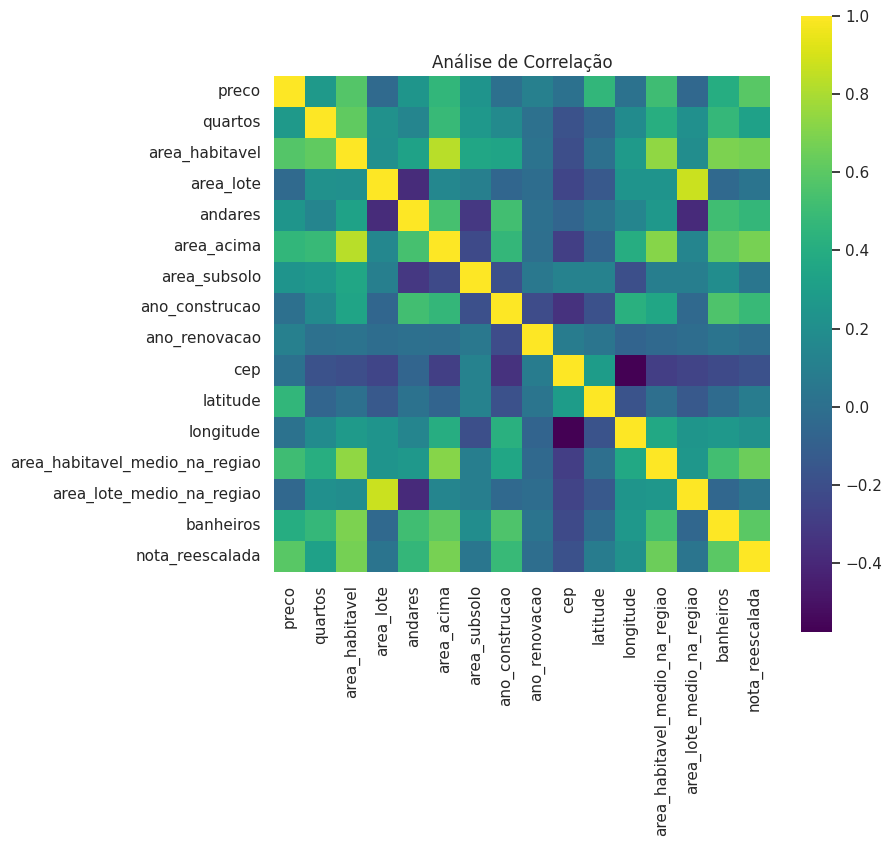

In [295]:
## Grafico de correlação de Pearson das variaveis númericas.

correlation = dados_numericos.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, vmax=1, square=True,annot=False,cmap='viridis')

plt.title('Análise de Correlação')

In [296]:
## verificando as correlações
correlation

,preco,quartos,area_habitavel,area_lote,andares,area_acima,area_subsolo,ano_construcao,ano_renovacao,cep,latitude,longitude,area_habitavel_medio_na_regiao,area_lote_medio_na_regiao,banheiros,nota_reescalada
preco,1.000000,0.269118,0.578357,-0.035477,0.247624,0.461782,0.239884,0.001959,0.101569,0.010561,0.461175,0.020847,0.512243,-0.047368,0.401402,0.591366
quartos,0.269118,1.000000,0.613248,0.215361,0.143931,0.485178,0.261909,0.172064,0.006494,-0.177270,-0.067759,0.176754,0.414022,0.206163,0.471017,0.319376
area_habitavel,0.578357,0.613248,1.000000,0.206669,0.329003,0.833685,0.355099,0.342686,0.023847,-0.205271,-0.002104,0.275219,0.739659,0.187777,0.691658,0.670619
area_lote,-0.035477,0.215361,0.206669,1.000000,-0.382113,0.156297,0.100474,-0.063163,-0.016340,-0.255176,-0.143946,0.241573,0.241491,0.874921,-0.044380,0.032988
andares,0.247624,0.143931,0.329003,-0.382113,1.000000,0.532299,-0.319935,0.525389,-0.003543,-0.069699,0.019129,0.142918,0.263163,-0.391379,0.517774,0.467330
area_acima,0.461782,0.485178,0.833685,0.156297,0.532299,1.000000,-0.220209,0.469140,-0.007305,-0.286571,-0.076177,0.402753,0.716715,0.141779,0.609740,0.676280
area_subsolo,0.239884,0.261909,0.355099,0.100474,-0.319935,-0.220209,1.000000,-0.188851,0.054489,0.122524,0.125235,-0.195643,0.093250,0.091678,0.189551,0.039749
ano_construcao,0.001959,0.172064,0.342686,-0.063163,0.525389,0.469140,-0.188851,1.000000,-0.215598,-0.350852,-0.183748,0.426755,0.355811,-0.045480,0.561994,0.488416
ano_renovacao,0.101569,0.006494,0.023847,-0.016340,-0.003543,-0.007305,0.054489,-0.215598,1.000000,0.078173,0.033583,-0.075997,-0.044690,-0.018959,0.027750,-0.011246
cep,0.010561,-0.177270,-0.205271,-0.255176,-0.069699,-0.286571,0.122524,-0.350852,0.078173,1.000000,0.289282,-0.576278,-0.287555,-0.256667,-0.220220,-0.185725


In [297]:
## verificando as correlações com preço

correlation['preco'] > 0.4

preco                              True
quartos                           False
area_habitavel                     True
area_lote                         False
andares                           False
area_acima                         True
area_subsolo                      False
ano_construcao                    False
ano_renovacao                     False
cep                               False
latitude                           True
longitude                         False
area_habitavel_medio_na_regiao     True
area_lote_medio_na_regiao         False
banheiros                          True
nota_reescalada                    True
Name: preco, dtype: bool

### Identificamos as seguintes correlações com preço:

### Área habitável, área acima (sobrados), latitude, área média dos imóveis na região, quantidade de banheiros e nota do imóvel.



In [298]:
dados.head()

,preco,quartos,banheiros,area_habitavel,area_lote,andares,vista_mar,vista,condicao,area_acima,area_subsolo,ano_construcao,ano_renovacao,cep,latitude,longitude,area_habitavel_medio_na_regiao,area_lote_medio_na_regiao,nota_reescalada
0,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,3,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,2.692308
1,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,3,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,2.692308
2,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,3,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,2.307692
3,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,5,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,2.692308
4,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,3,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,3.076923


# Correlação Point-Biserial

Vamos utilizar a análise point-biserial para identificar a correlação das variáveis categóricas com o preço

In [299]:
dados_categoricos.columns

Index(['vista', 'condicao'], dtype='object')

In [300]:
# calculando a correlação de Point-Biserial para cada variável categórica com preco

correlacoes = {}
for col in dados_categoricos.columns:
    if col != 'preco':
        corr, p_valor = stats.pointbiserialr(dados_categoricos[col], dados['preco'])
        correlacoes[col] = {'correlacao': corr, 'p_valor': p_valor}

# mostrando resultados
print("Correlação de Point-Biserial com 'preco':")
for col, info in correlacoes.items():
     print(f"{col}: Correlação = {info['correlacao']:.4f}, p-valor = {info['p_valor']:.4f}")

Correlação de Point-Biserial com 'preco':
vista: Correlação = 0.2440, p-valor = 0.0000
condicao: Correlação = 0.0557, p-valor = 0.0000


Identificamos que as categorias vista tem uma boa correlação com o preço, apesar de fraca.




In [301]:
dados.columns


Index(['preco', 'quartos', 'banheiros', 'area_habitavel', 'area_lote',
       'andares', 'vista_mar', 'vista', 'condicao', 'area_acima',
       'area_subsolo', 'ano_construcao', 'ano_renovacao', 'cep', 'latitude',
       'longitude', 'area_habitavel_medio_na_regiao',
       'area_lote_medio_na_regiao', 'nota_reescalada'],
      dtype='object')

## Importando as demais bibliotecas

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Regressão Linear Multivariada

Vamos primeiramente realizar uma análise de regressão pelo Statsmodels. Para conseguirmos ver estatísticamente os detalhes do modelo.

In [303]:
import statsmodels.api as sm

# Selecionando apenas colunas numéricas para X, removendo 'preco'

X = dados.drop('preco', axis=1)  # Removendo a coluna 'preco'
y = dados['preco']

# Adicionando a constante para o modelo
X = sm.add_constant(X)

# Ajustando o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Imprimindo o resumo estatístico do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2327.
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:11:27   Log-Likelihood:            -2.2385e+05
No. Observations:               17182   AIC:                         4.477e+05
Df Residuals:                   17164   BIC:                         4.479e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Identificamos pelo p-valor que todas as variáveis são estatiscamentes relevantes. Vamos manter todas

# Vamos realizar agora usando LinearRegression (Scikit-learn)
### Separandos Treino e Teste

In [304]:
from sklearn.model_selection import train_test_split

X = dados.drop(['preco'], axis= 1)  ## retiramos apenas o preço.
y = dados['preco']
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=4)

In [305]:
## criando o modelo

from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train.ravel())

LinearRegression()

In [306]:
## confimando a separação de treino e teste

print("{0:0.2f}% está em treino".format((len(X_train)/len(dados.index)) * 100))
print("{0:0.2f}% está em teste".format((len(X_test)/len(dados.index)) * 100))

70.00% está em treino
30.00% está em teste


# Avaliando o Desempenho do Modelo

In [307]:
## Conforme visto nosso modelo apresenta uma precisão de 70%

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print('R2 score: %.2f' % r2_score(y_test, y_pred))
print('R2 score: %.2f' % model.score(X_test, y_test))

R2 score: 0.70
R2 score: 0.70


## Nosso RMSE está em 109.540
Infelizmente com a Regressão Linear esse foi nosso menor número alcançado.

In [308]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 109540.54238712968


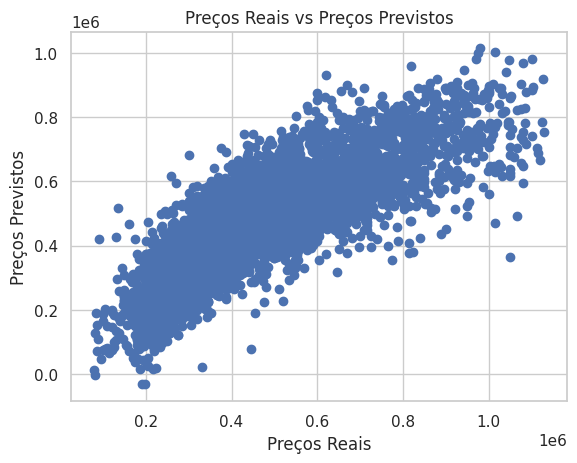

In [309]:
# Visualizar os resultados

plt.scatter(y_test, y_pred)
plt.xlabel('Preços Reais')
plt.ylabel('Preços Previstos')
plt.title('Preços Reais vs Preços Previstos')
plt.show()

## Melhorando o Modelo

Mudamos e tratamos os dados de diferentes formas para se alcançar o melhor resultado e o menor RMSE possível, contudo o menor número alcançado continua sendo de 109.540 usando apenas a regressão.

Decidimos então, apesar de não ser solicitado, combinar nosso modelo de Regressão com os modelos de boosting, como XGBoost e LightGBM.

Dessa forma conseguimos capturar padrões complexos nos dados e podemos complementar a  regressão linear.





In [310]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

# Modelos base
estimators = [
    ('linear', LinearRegression()),
    ('xgboost', XGBRegressor(n_estimators=100)),
    ('lightgbm', LGBMRegressor(n_estimators=100))
]

# Modelo meta
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)


In [311]:
# Avaliação do modelo
scores = cross_val_score(stacking_model, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f'Stacking Model - Mean RMSE: {rmse_scores.mean()} (STD: {rmse_scores.std()})')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2246
[LightGBM] [Info] Number of data points in the train set: 15463, number of used features: 17
[LightGBM] [Info] Start training from score 463575.959969
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2236
[LightGBM] [Info] Number of data points in the train set: 12370, number of used features: 17
[LightGBM] [Info] Start training from score 463567.802506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

In [312]:
# Ajustando o modelo aos dados completos

stacking_model.fit(X, y)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2250
[LightGBM] [Info] Number of data points in the train set: 17182, number of used features: 17
[LightGBM] [Info] Start training from score 462835.666162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2242
[LightGBM] [Info] Number of data points in the train set: 13745, number of used features: 17
[LightGBM] [Info] Start training from score 463403.762968
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

StackingRegressor(estimators=[('linear', LinearRegression()),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            intera...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('lightgbm', LGBMRegressor())],
                  final_estimator=LinearRegression())

In [313]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [314]:

## conferindo o score de nosso modelo aprimorado

y_pred = stacking_model.predict(X_test)

print('R2 score: %.2f' % r2_score(y_test, y_pred))
print('R2 score: %.2f' % stacking_model.score(X_test, y_test))

resultado_rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', resultado_rmse)

mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')

R2 score: 0.93
R2 score: 0.93
RMSE: 50685.72496137598
MAE: 36852.17


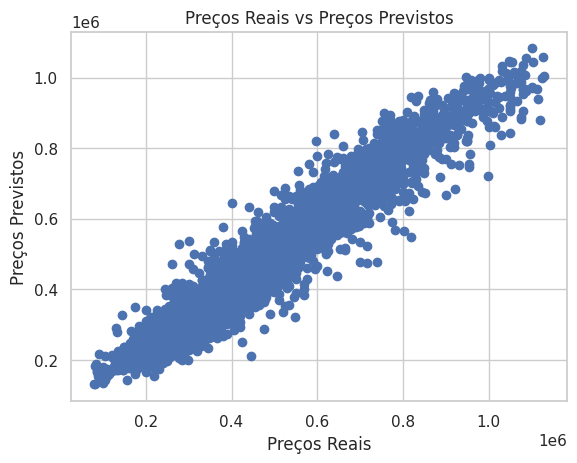

In [315]:
# Visualizar os resultados com os modelos

plt.scatter(y_test, y_pred)
plt.xlabel('Preços Reais')
plt.ylabel('Preços Previstos')
plt.title('Preços Reais vs Preços Previstos')
plt.show()

# Fazendo Previsões com Novos Dados

In [316]:
## para fazermos novas previsões devemos inserir os seguintes dados que estão em X:

X.head()

,quartos,banheiros,area_habitavel,area_lote,andares,vista_mar,vista,condicao,area_acima,area_subsolo,ano_construcao,ano_renovacao,cep,latitude,longitude,area_habitavel_medio_na_regiao,area_lote_medio_na_regiao,nota_reescalada
0,3,1.00,109.62554,524.901950,1.0,0,0,3,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,2.692308
1,3,2.25,238.76071,672.803526,2.0,0,0,3,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,2.692308
2,2,1.00,71.53531,929.030000,1.0,0,0,3,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,2.307692
3,4,3.00,182.08988,464.515000,1.0,0,0,5,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,2.692308
4,3,2.00,156.07704,750.656240,1.0,0,0,3,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,3.076923


In [317]:
X.columns

Index(['quartos', 'banheiros', 'area_habitavel', 'area_lote', 'andares',
       'vista_mar', 'vista', 'condicao', 'area_acima', 'area_subsolo',
       'ano_construcao', 'ano_renovacao', 'cep', 'latitude', 'longitude',
       'area_habitavel_medio_na_regiao', 'area_lote_medio_na_regiao',
       'nota_reescalada'],
      dtype='object')

In [322]:
# Novos dados para predição

Teste = [
    [3, 2, 140, 160, 2, 1, 3, 3, 0, 0, 1995, 2010, 98001, 47.5, -122.2, 140, 160, 10],  ## colocamos parametros de uma casa de médio padrão
    [4, 3, 260, 320, 2, 0, 4, 5, 60, 600, 2005, 2015, 98002, 47.6, -122.3, 2600, 6500, 9], ## colocamos parametros de uma casa de alto padrão
    [2, 2, 60, 60, 0, 0, 0, 2, 0, 0, 2978, 1990, 98002, 47.6, -122.3, 70, 70, 6] ## colocamos parametros de uma casa de baixo padrão
]

In [323]:
# Fazendo previsões com o modelo carregado
predictions = stacking_model.predict(Teste)

mediopred = predictions[0]
altopred = predictions[1]
baixopred = predictions[2]

print(f'Preço da casa de alto padrão: {altopred}')
print(f'Preço da casa de médio padrão: {mediopred}')
print(f'Preço da casa de baixo padrão: {baixopred}')

Preço da casa de alto padrão: 1017511.1441202941
Preço da casa de médio padrão: 614568.7707029297
Preço da casa de baixo padrão: 550005.5546639916


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Salvando o Modelo

In [ ]:
# Salvando o modelo treinado
'''  import joblib

  joblib.dump(stacking_model, 'stacking_model.pkl')

  '''

# Para Carregar

In [ ]:
# Carregar o modelo salvo
'''
    stacking_model_loaded = joblib.load('stacking_model.pkl')

    '''